# K-Nearest Neighbors

- Tìm k điểm gần nhất của dữ liệu mới
- Lazy learning (instance-based learning): không cần tranning, đi tìm có tỷ lệ gần giống cao nhất
- Với KNN, trong bài toán Classification, label của một điểm dữ liệu mới (hay kết quả của câu hỏi trong bài thi) được suy ra trực tiếp từ K điểm dữ liệu gần nhất trong training set. Label của một test data có thể được quyết định bằng major voting (bầu chọn theo số phiếu) giữa các điểm gần nhất, hoặc nó có thể được suy ra bằng cách đánh trọng số khác nhau cho mỗi trong các điểm gần nhất đó rồi suy ra label.

- Trong bài toán Regresssion, đầu ra của một điểm dữ liệu sẽ bằng chính đầu ra của điểm dữ liệu đã biết gần nhất (trong trường hợp K=1), hoặc là trung bình có trọng số của đầu ra của những điểm gần nhất, hoặc bằng một mối quan hệ dựa trên khoảng cách tới các điểm gần nhất đó.

- Một cách ngắn gọn, KNN là thuật toán đi tìm đầu ra của một điểm dữ liệu mới bằng cách chỉ dựa trên thông tin của K điểm dữ liệu trong training set gần nó nhất (K-lân cận), không quan tâm đến việc có một vài điểm dữ liệu trong những điểm gần nhất này là nhiễu. Hình dưới đây là một ví dụ về KNN trong classification với K = 1.


## Example

### IRIS 1D

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
import pandas as pd

In [2]:
data = pd.read_csv(r'../data/iris_1D.csv')
data

,Petal_Length,Label
0,1.4,0.0
1,1.0,0.0
2,1.5,0.0
3,3.1,1.0
4,3.8,1.0
5,4.1,1.0


In [3]:
# get x
x_data = data['Petal_Length'].to_numpy()
x_data = x_data.reshape(6, 1)
print(x_data)

[[1.4]
 [1. ]
 [1.5]
 [3.1]
 [3.8]
 [4.1]]


In [4]:
# get y
y_data = data['Label'].to_numpy()
print(y_data)

[0. 0. 0. 1. 1. 1.]


In [5]:
# unknown input
x_test = [[2.4]]

#### Way 1

In [6]:
# get model
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_data, y_data)

KNeighborsClassifier(n_neighbors=3)

In [7]:
y_pred = classifier.predict(x_test)
print(y_pred)

[0.]


#### Way 2

In [8]:
# get model
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(x_data, y_data)

KNeighborsClassifier(n_neighbors=6)

In [9]:
y_pred = classifier.kneighbors(x_test)
print(y_pred)

(array([[0.7, 0.9, 1. , 1.4, 1.4, 1.7]]), array([[3, 2, 0, 1, 4, 5]], dtype=int64))


In [10]:
classifier.classes_[classifier._y[3]]

1.0

### IRIS_2D

In [11]:
data = pd.read_csv('../data/iris_2D.csv')
data

,Petal_Length,Petal_Width,Label
0,1.4,0.2,0.0
1,1.3,0.4,0.0
2,1.4,0.3,0.0
3,4.0,1.0,1.0
4,4.7,1.4,1.0
5,3.6,1.3,1.0


In [12]:
# get x
x_data = data[['Petal_Length', 'Petal_Width']].to_numpy()
x_data = x_data.reshape(6, 2)
print(x_data)

[[1.4 0.2]
 [1.3 0.4]
 [1.4 0.3]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]]


In [13]:
# get y
y_data = data['Label'].to_numpy()
print(y_data)

[0. 0. 0. 1. 1. 1.]


In [14]:
x_test = [[2.6, 0.7]]

#### Way 1

In [15]:
# get model
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_data, y_data)

KNeighborsClassifier(n_neighbors=1)

In [16]:
y_pred = classifier.predict(x_test)
print(y_pred)

[1.]


#### Way 2

In [17]:
# get model
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(x_data, y_data)

KNeighborsClassifier(n_neighbors=6)

In [18]:
y_pred = classifier.kneighbors(x_test)
print(y_pred)

(array([[1.16619038, 1.26491106, 1.3       , 1.33416641, 1.43178211,
        2.21359436]]), array([[5, 2, 0, 1, 3, 4]], dtype=int64))


In [19]:
classifier.classes_[classifier._y[3]]

1.0

### Using Scaling

- Các thuật toán dựa trên khoảng cách, chẳng hạn như KNN, tính toán khoảng cách giữa các điểm dữ liệu để xác định độ giống nhau của chúng.

- Các đặc điểm có cường độ lớn hơn có thể ảnh hưởng không tương xứng đến việc tính toán khoảng cách, dẫn đến kết quả sai lệch.

- Chia tỷ lệ tính năng giải quyết vấn đề này bằng cách chuyển đổi các tính năng sang phạm vi hoặc tỷ lệ có thể so sánh được, đảm bảo rằng mỗi tính năng đóng góp một cách công bằng vào kết quả cuối cùng.

- Hãy tưởng tượng bạn đang đo lường sự giống nhau giữa hai ngôi nhà dựa trên kích thước của chúng (tính bằng feet vuông) và số phòng.

- Đưa tất cả các tính năng về cùng một tỷ lệ để áp dụng các thuật toán dựa trên khoảng cách như KNN hoặc K-Means

#### in cm

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('../data/iris_2D_mm.csv')

# get x
x_data = data[['Petal_Length', 'Petal_Width']].to_numpy()
x_data = x_data.reshape(6, 2)
print(x_data)

# get y
y_data = data['Label'].to_numpy()
print(y_data)

[[ 1.4  2. ]
 [ 1.3  4. ]
 [ 1.4  3. ]
 [ 4.  10. ]
 [ 4.7 14. ]
 [ 3.6 13. ]]
[0. 0. 0. 1. 1. 1.]


In [21]:
scaler = StandardScaler()
scaler.fit(x_data)

x_data = scaler.transform(x_data)
print(x_data)

[[-0.94942533 -1.16756479]
 [-1.02063223 -0.7554831 ]
 [-0.94942533 -0.96152395]
 [ 0.90195406  0.48076197]
 [ 1.40040236  1.30492536]
 [ 0.61712646  1.09888451]]


In [22]:
# get model
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(x_data, y_data)

# unknown input
x_test = [[2.6, 0.7]]
x_test = scaler.transform(x_test)
print(x_test)

y_pred = classifier.kneighbors(x_test)
print(y_pred)

[[-0.09494253 -1.43541789]]
(array([[0.89548095, 0.97709586, 1.14856986, 2.15998799, 2.63243821,
        3.12178434]]), array([[0, 2, 1, 3, 5, 4]], dtype=int64))


#### in mm

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('../data/iris_2D_mm.csv')

# get x
x_data = data[['Petal_Length', 'Petal_Width']].to_numpy()
x_data = x_data.reshape(6, 2)
print(x_data)

# get y
y_data = data['Label'].to_numpy()
print(y_data)

[[ 1.4  2. ]
 [ 1.3  4. ]
 [ 1.4  3. ]
 [ 4.  10. ]
 [ 4.7 14. ]
 [ 3.6 13. ]]
[0. 0. 0. 1. 1. 1.]


In [24]:
scaler = StandardScaler()
scaler.fit(x_data)

x_data = scaler.transform(x_data)
print(x_data)

[[-0.94942533 -1.16756479]
 [-1.02063223 -0.7554831 ]
 [-0.94942533 -0.96152395]
 [ 0.90195406  0.48076197]
 [ 1.40040236  1.30492536]
 [ 0.61712646  1.09888451]]


In [25]:
# get model
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(x_data, y_data)

# unknown input
x_test = [[2.6, 7.0]]
x_test = scaler.transform(x_test)
print(x_test)

y_pred = classifier.kneighbors(x_test)
print(y_pred)

[[-0.09494253 -0.13736056]]
(array([[1.11309338, 1.17297838, 1.18717569, 1.33845493, 1.42665488,
        2.07755746]]), array([[1, 3, 2, 0, 5, 4]], dtype=int64))


### BoW

In [26]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

In [27]:
vectorizer = CountVectorizer()
corpus = ["góp gió gặt bão",
          "có làm mới có ăn",
          "đất lành chim đậu",
          "ăn cháo đá bát",
          "gậy ông đập lưng ông",
          "qua cầu rút ván"]
X = vectorizer.fit_transform(corpus)

In [28]:
X.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
        0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1,
        0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0]], dtype=int64)

In [29]:
x_test = vectorizer.transform(['không làm cạp đất mà ăn']).toarray()
x_test

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0]], dtype=int64)

In [30]:
y_data = np.array([1, 1, 1, 0, 0, 0])
y_data

array([1, 1, 1, 0, 0, 0])

In [31]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(X.toarray(), y_data)

y_pred = classifier.kneighbors(x_test)
print(y_pred)

(array([[2.23606798, 2.23606798, 2.44948974, 2.64575131, 2.64575131,
        3.16227766]]), array([[2, 3, 1, 0, 5, 4]], dtype=int64))


### KNN text cls

In [32]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np

In [33]:
corpus = [
    "góp gió gặt bão",
    "có làm mới có ăn",
    "đất lành chim đậu",
    "ăn cháo đá bát",
    "gậy ông đập lưng ông",
    "qua cầu rút ván"
]

n_doc = len(corpus)

labels = [1, 1, 1, 0, 0, 0] # 1: positive - 0: negative

cate_2_label = {
    "positive": 1,
    "negative": 0
}

In [34]:
def label_2_cate(labels):
    key_list = list(cate_2_label.keys())
    val_list = list(cate_2_label.values())

    position = [val_list.index(label) for label in labels]
    return np.array(key_list)[position]

In [35]:
X = np.array(corpus)
y = np.array(labels)

#### Convert text to vector by using TF-IDF transform

In [36]:
def caculate_tfidf(X_vectorized):
    tf = np.log(X_vectorized + 1)
    df = np.sum(X_vectorized, axis= 0)
    idf = np.log((n_doc+1)/(df+1)) + 1
    tfidf = tf * idf

    return idf, tf, tfidf

In [37]:
def compute_norm(tfidf_vec):
    norm = np.linalg.norm(tfidf_vec, axis = 1)
    n_doc = tfidf_vec.shape[0]
    for i in range(n_doc):
        tfidf_vec[i] /=  norm[i]

In [38]:
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X).toarray()
print("Vocab: ", vectorizer.get_feature_names_out())

Vocab:  ['bát' 'bão' 'chim' 'cháo' 'có' 'cầu' 'gió' 'góp' 'gậy' 'gặt' 'làm' 'lành'
 'lưng' 'mới' 'qua' 'rút' 'ván' 'ông' 'ăn' 'đá' 'đất' 'đập' 'đậu']


In [39]:
X_idf, x_tf, X_tfidf = caculate_tfidf(X_vectorized)

#### Normlize TF-IDF values by L2 norm

In [40]:
compute_norm(X_tfidf)

#### Train model KNN with 1 neighbor

In [41]:
knn_cls = KNeighborsClassifier(n_neighbors=3)
knn_cls.fit(X_tfidf, y)
preds = knn_cls.predict(X_tfidf)
print(preds)

[1 0 1 1 1 1]


#### Using pipeline of sklearn

In [42]:
text_clf_model = Pipeline([('vect', CountVectorizer()),
                            ('tfidf', TfidfTransformer()),
                            ('clf', KNeighborsClassifier(n_neighbors=1)),
                        ])

text_clf_model.fit(X, y)

preds = text_clf_model.predict(X)
print(preds)

[1 1 1 0 0 0]


#### Inference

In [43]:
test_text = np.array(["không làm cạp đất mà ăn"])
test_vec = vectorizer.transform(test_text).toarray()

In [44]:
test_tf = np.log(test_vec + 1)
test_tfidf = test_tf * X_idf

In [45]:
compute_norm(test_tfidf)

In [46]:
pred = knn_cls.predict(test_tfidf)

print(label_2_cate(pred))

['positive']


## KNN for classification

- Xử lý dữ liệu
- Chọn K giá trị nhỏ nhất
- Tính khoảng cách với cách điểm còn lại
- Sắp xếp các điểm
- Lấy K điểm
- Chọn theo số đông


### Optimal K-KNN Classification

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report


In [48]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
print('Number of classes: %d' %len(np.unique(iris_y)))
print('Number of data points: %d' %len(iris_y))


Number of classes: 3
Number of data points: 150


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     iris_X, iris_y, test_size=50)

print ("Training size: %d" %len(y_train))
print ("Test size    : %d" %len(y_test))

Training size: 100
Test size    : 50


In [50]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 8, p = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Print results for 20 test data points:")
print ("Predicted labels: ", y_pred[20:40])
print ("Ground truth    : ", y_test[20:40])

print ("Accuracy of 10NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Print results for 20 test data points:
Predicted labels:  [0 1 1 0 0 0 1 1 2 0 1 0 1 1 1 1 2 2 2 1]
Ground truth    :  [0 1 1 0 0 0 1 2 1 0 1 0 1 1 1 1 2 2 2 1]
Accuracy of 10NN with major voting: 94.00 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.95      0.90      0.92        20
           2       0.87      0.93      0.90        14

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



In [51]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 8, p = 2, weights = 'distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print ("Accuracy of 10NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))


Accuracy of 10NN with major voting: 92.00 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.85      0.89        20
           2       0.81      0.93      0.87        14

    accuracy                           0.92        50
   macro avg       0.92      0.93      0.92        50
weighted avg       0.93      0.92      0.92        50



In [52]:
def myweight(distances):
    sigma2 = .5 # we can change this number
    return np.exp(-distances**2/sigma2)

clf = neighbors.KNeighborsClassifier(n_neighbors = 8, p = 2, weights = myweight)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print ("Accuracy of 10NN with major voting: %.2f %%" %(100*accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy of 10NN with major voting: 92.00 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.85      0.89        20
           2       0.81      0.93      0.87        14

    accuracy                           0.92        50
   macro avg       0.92      0.93      0.92        50
weighted avg       0.93      0.92      0.92        50



In [53]:
df = pd.read_csv('../data/TeleCustomers.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [54]:
X = df.drop(['custcat'], axis = 1)
y = df['custcat']
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Train Model and Predict
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.32


Minimum error:- 0.615 at K = 37


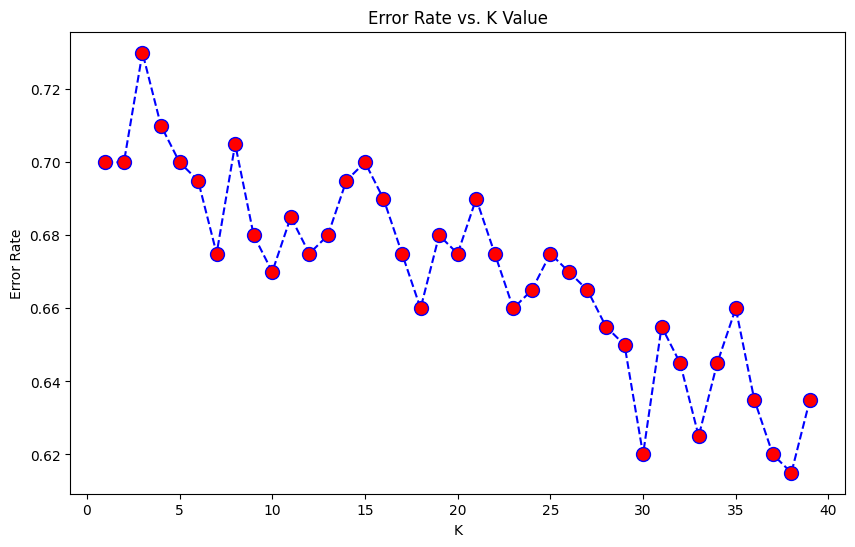

In [55]:
error_rate = []
for i in range(1,40):
 knn = neighbors.KNeighborsClassifier(n_neighbors=i,weights = 'distance')
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.385 at K = 37


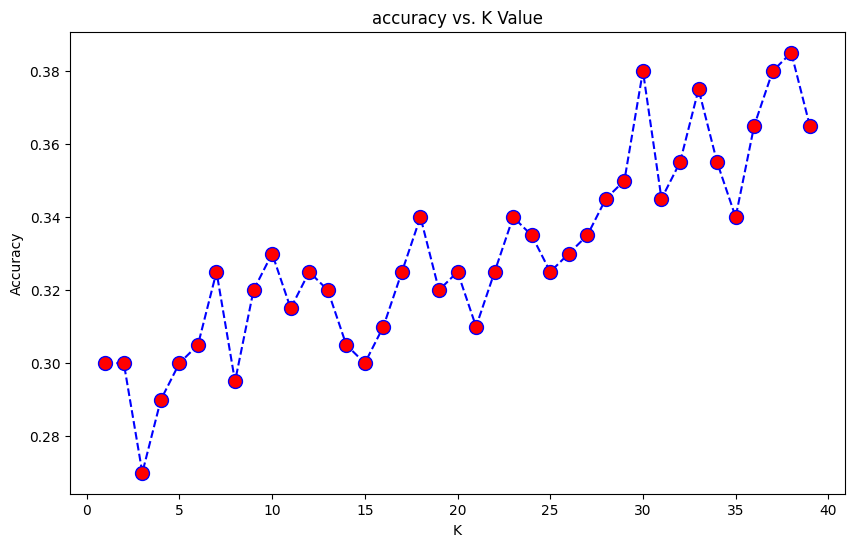

In [56]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = neighbors.KNeighborsClassifier(n_neighbors = i,weights = 'distance').fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('slr', LinearRegression())])
knn_lr = KNeighborsRegressor(n_neighbors = 3)

In [58]:
df=pd.read_csv("../data/cruise_ship_info.csv")
df.head()
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']
X = df[cols_selected].iloc[:,0:4].values

y = df[cols_selected]['crew']
sc_y = StandardScaler()
train_score_lr = []
train_score_knn =  []

In [59]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [60]:
sc_y

StandardScaler()

In [61]:
n = 15
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split( X, y,
                                      test_size=0.3, random_state=i)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    train_score_lr = np.append(train_score_lr,
                               np.mean(cross_val_score(pipe_lr,
                               X_train, y_train_std,
                               scoring ='r2' , cv = 10)))
    train_score_knn = np.append(train_score_knn,
                                np.mean(cross_val_score(knn_lr,
                                X_train, y_train_std,
                                scoring ='r2' , cv = 10)))
train_mean_lr = np.mean(train_score_lr)
train_std_lr = np.std(train_score_lr)
train_mean_knn = np.mean(train_score_knn)
train_std_knn = np.std(train_score_knn)
print('R2 train for lr: %.3f +/- %.3f' %
                             (train_mean_lr,train_std_lr))
print('R2 train for knn_lr: %.3f +/- %.3f' %
                             (train_mean_knn,train_std_knn))

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

ValueError: x and y must have same first dimension, but have shapes (15,) and (0,)

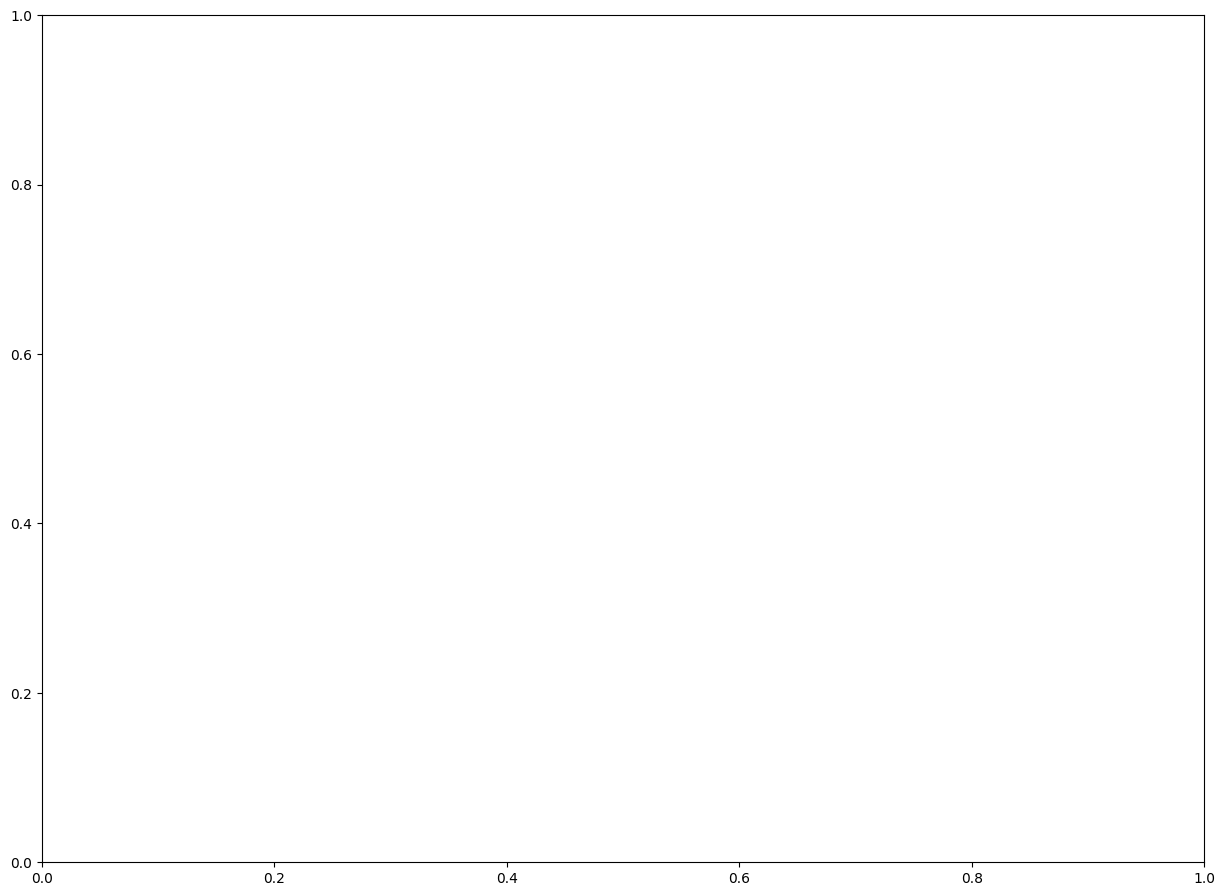

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,11))
plt.plot(range(n),train_score_lr,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='blue', markersize=10,
         label='linear regression')
plt.fill_between(range(n),
                 train_score_lr + train_std_lr,
                 train_score_lr - train_std_lr,
                 alpha=0.15, color='blue')
plt.plot(range(n),train_score_knn,color='green', linestyle='dashed',
         marker='s',markerfacecolor='green', markersize=10,
         label = 'Kneighbors regression')
plt.fill_between(range(n),
                 train_score_knn + train_std_knn,
                 train_score_knn - train_std_knn,
                 alpha=0.15, color='green')
plt.grid()
plt.ylim(0.7,1)
plt.title('Mean cross-validation R2 score vs. random state parameter', size = 14)
plt.xlabel('Random state parameter', size = 14)
plt.ylabel('Mean cross-validation R2 score', size = 14)
plt.legend()
plt.show()

In [ ]:
import csv
import numpy as np
import math

In [ ]:
def loadData(path):
    f = open(path, "r")
    data = csv.reader(f) #csv format
    data = np.array(list(data))# covert to matrix
    data = np.delete(data, 0, 0)# delete header
    data = np.delete(data, 0, 1) # delete index
    np.random.shuffle(data) # shuffle data
    f.close()
    trainSet = data[:100] #training data from 1->100
    testSet = data[100:]# the others is testing data
    return trainSet, testSet

In [ ]:
def calcDistancs(pointA, pointB, numOfFeature=4):
    tmp = 0
    for i in range(numOfFeature):
        tmp += (float(pointA[i]) - float(pointB[i])) ** 2
    return math.sqrt(tmp)

In [ ]:
def kNearestNeighbor(trainSet, point, k):
    distances = []
    for item in trainSet:
        distances.append({
            "label": item[-1],
            "value": calcDistancs(item, point)
        })
    distances.sort(key=lambda x: x["value"])
    labels = [item["label"] for item in distances]
    return labels[:k]

In [ ]:
def findMostOccur(arr):
    labels = set(arr) # set label
    ans = ""
    maxOccur = 0
    for label in labels:
        num = arr.count(label)
        if num > maxOccur:
            maxOccur = num
            ans = label
    return ans

In [ ]:
if __name__ == "__main__":
    trainSet, testSet = loadData("../data/Iris.csv")
    print(trainSet.size)
    for item in testSet:
        knn = kNearestNeighbor(trainSet, item, 5)
        answer = findMostOccur(knn)
        print("label: {} -> predicted: {}".format(item[-1], answer))

500
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-setosa -> predicted: Iris-setosa
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-virginica -> predicted: Iris-virginica
label: Iris-setosa -> predicted: Iris-setosa
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-setosa -> predicted: Iris-setosa
label: Iris-setosa -> predicted: Iris-setosa
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-setosa -> predicted: Iris-setosa
label: Iris-virginica -> predicted: Iris-virginica
label: Iris-setosa -> predicted: Iris-setosa
label: Iris-setosa -> predicted: Iris-setosa
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-virginica -> predicted: Iris-virginic

In [ ]:
#Required Libraries
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
penguin= pd.read_csv("../data/penguins.csv")
penguin.head(2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE


In [ ]:
x = penguin[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']]
y = penguin[['species']]

In [ ]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, stratify = y,random_state = 4)
X_test = np.array(X_test)
X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
def knn_modified(X_train,y_train,X_test,k):
    pred = []
    for j in range(len(X_test)):
        distance = []
        min_dist = math.inf
        for i in range(len(X_train)):
            eulidean_distance = np.sqrt(np.sum((X_test[j,] - X_train[i,])**2))
            if eulidean_distance < min_dist:
                distance.append((eulidean_distance, i))
            else:
                continue

        #Sort the list by distance
        distance.sort()

        #Get the row index of its nearest neighbour
        neighbours = []

        for j in range(k):
            neighbours.append(distance[j][1])

        #Append the actual target in a list
        target = []
        for l in range(k):
            target.append(np.array(y_train)[neighbours[l]][0])

        #Create a function for counting
        count = {}
        for t in target:
            count[t] = count.get(t,0) + 1

        #Create a list with (value, key) pair
        pairs = []
        for key in count:
            pairs.append((count[key], key))

        #Sort the pair and get the most occurring word
        pairs.sort(reverse=True)
        if k%2 == 0:
            even = []
            for i in range(0,len(pairs)):
                if pairs[0][0] == pairs[i][0]:
                    even.append(pairs[i][1])
            #print('Arranging in decreasing order: ',even)
            for j in neighbours:
                if y_train[j][0] in even:
                    pred.append(y_train[j][0])
                    #print('Value with the least distance classifies: ',y_train[j][0])
                    #print('Picking classifier based on least distance: ',y_train[j][0])
                    break
                else:
                    pred.append(pairs[0][1])
                    break
        else:
            pred.append(pairs[0][1])

    return(pred)

In [ ]:
n = 2
pred = knn_modified(X_train,y_train,X_test,k=n)

In [ ]:
neighbors = list(range(1,11))

scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm='brute', metric='euclidean')
    pred1 = knn.fit(X_train, y_train)
    pred = pred1.predict(X_test)
    accuracy =  accuracy_score(y_test, pred)
    scores.append(accuracy)
scores1 = []
neighbors = list(range(1,11))
for i in neighbors:
    pred = knn_modified(X_train,y_train,X_test,k=i)
    accuracy =  accuracy_score(y_test, pred)
    scores1.append(accuracy)

## KNN for regression

- Chọn K
- Tính khoảng cách
- Tìm K điểm gần nhất
- Tính trung bình (mean, median,...)


## KNN with brute-force

- Tính khoảng cách từ điểm mới đến tất cả các điểm còn lại trong dataset (vét cạn)


## KNN with K-D tree

- Thay vì tính khoảng cách từ điểm mới đến tất cả các điểm còn lại trong dataset?
- Tìm K điểm gần nhất 1 cách nhanh nhất
- Chọn ngẫu nhiên 1 feature
- Tính median => Chia dataset thành 2 nửa
- Chọn feature kế tiếp
- Tính median theo feture kế tiếp => ta được 1 cây phân loại dữ liệu để tìm K điểm gần nhất nhanh nhất
- Fit trong sklearn: sắp xếp dữ liệu theo 1 từng loại thuật toán sử dụng để tìm kiếm dữ liệu nhanh hơn

## KNN with ball tree

- Lấy bất kì 1 điểm
- Tìm điểm xa nhất từ điểm mới
- Tìm điểm xa nhất từ điểm mới tìm được
- Chiếu tất cả các điểm lên đường thẳng
- Tìm median trên đường thẳng
- Tìm tâm đại diện cho 2 khoảng được phân chia từ median
- Tiếp tục chia trong các khoảng được chia
- Khi có dữ liệu mới, ta tính khoảng cách ngắn nhất từ điểm mới đến tâm đường tròn đã được xây dựng bên trên dựa theo đường median